<a href="https://colab.research.google.com/github/Djthebestone/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#21BDS0101

# 1. Load Dataset and **Inspect**

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/Caravan.csv")

# Check the first and last few rows
print(data.head())
print(data.tail())

# Get the dimensions of the dataset
print(f"Shape: {data.shape}")

# Check data types and null values
print(data.info())
print(data.isnull().sum())


   rownames  MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  \
0         1       33         1        3         2         8       0       5   
1         2       37         1        2         2         8       1       4   
2         3       37         1        2         2         8       0       4   
3         4        9         1        3         3         3       2       3   
4         5       40         1        4         2        10       1       4   

   MGODOV  MGODGE  ...  APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  APLEZIER  \
0       1       3  ...         0        0        0       1        0         0   
1       1       4  ...         0        0        0       1        0         0   
2       2       4  ...         0        0        0       1        0         0   
3       2       4  ...         0        0        0       1        0         0   
4       1       4  ...         0        0        0       1        0         0   

   AFIETS  AINBOED  ABYSTAND  Purchase

# **2. Summary Statistics**

In [3]:
# Summary statistics for numeric columns
print(data.describe())

# Count distinct values in each column
distinct_counts = data.nunique()
print(distinct_counts)

# Frequency of unique values in a categorical column (e.g., 'Purchase')
if 'Purchase' in data.columns:
    print(data['Purchase'].value_counts())


          rownames      MOSTYPE     MAANTHUI      MGEMOMV     MGEMLEEF  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean   2911.500000    24.253349     1.110615     2.678805     2.991240   
std    1680.810965    12.846706     0.405842     0.789835     0.814589   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%    1456.250000    10.000000     1.000000     2.000000     2.000000   
50%    2911.500000    30.000000     1.000000     3.000000     3.000000   
75%    4366.750000    35.000000     1.000000     3.000000     3.000000   
max    5822.000000    41.000000    10.000000     5.000000     6.000000   

          MOSHOOFD       MGODRK       MGODPR       MGODOV       MGODGE  ...  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000  ...   
mean      5.773617     0.696496     4.626932     1.069907     3.258502  ...   
std       2.856760     1.003234     1.715843     1.017503     1.597647  ...   
min       1.00000

# **3. Data Handling**

In [25]:
# Replace missing values with column mean for numeric columns
data.fillna(data.mean(), inplace=True)

# why do we get this error?
# Because theRE are no null values

TypeError: 'Categorical' with dtype category does not support reduction 'mean'

**The above code has no NULL values that is why we get an error.**

In [7]:
# Standardize numeric columns
from sklearn.preprocessing import StandardScaler

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Add z-scores for a specific numeric column (e.g., 'MSKC')
if 'MSKC' in numeric_cols:
    data['z_MSKC'] = (data['MSKC'] - data['MSKC'].mean()) / data['MSKC'].std()

In [13]:
data['z_MSKC']

,z_MSKC
0,1.157968
1,0.641324
2,0.124680
3,0.124680
4,-1.941897
...,...
5817,-0.391964
5818,-1.941897
5819,0.124680
5820,0.641324


# 4. Data **Cleaning**

In [14]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

# Drop duplicates if necessary
data = data.drop_duplicates()

# Identify outliers using IQR for a numeric column
def iqr_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

if 'MSKC' in numeric_cols:
    data['outliers_MSKC'] = iqr_outliers(data['MSKC'])
    print(data[data['outliers_MSKC']])


Number of duplicates: 0
Empty DataFrame
Columns: [rownames, MOSTYPE, MAANTHUI, MGEMOMV, MGEMLEEF, MOSHOOFD, MGODRK, MGODPR, MGODOV, MGODGE, MRELGE, MRELSA, MRELOV, MFALLEEN, MFGEKIND, MFWEKIND, MOPLHOOG, MOPLMIDD, MOPLLAAG, MBERHOOG, MBERZELF, MBERBOER, MBERMIDD, MBERARBG, MBERARBO, MSKA, MSKB1, MSKB2, MSKC, MSKD, MHHUUR, MHKOOP, MAUT1, MAUT2, MAUT0, MZFONDS, MZPART, MINKM30, MINK3045, MINK4575, MINK7512, MINK123M, MINKGEM, MKOOPKLA, PWAPART, PWABEDR, PWALAND, PPERSAUT, PBESAUT, PMOTSCO, PVRAAUT, PAANHANG, PTRACTOR, PWERKT, PBROM, PLEVEN, PPERSONG, PGEZONG, PWAOREG, PBRAND, PZEILPL, PPLEZIER, PFIETS, PINBOED, PBYSTAND, AWAPART, AWABEDR, AWALAND, APERSAUT, ABESAUT, AMOTSCO, AVRAAUT, AAANHANG, ATRACTOR, AWERKT, ABROM, ALEVEN, APERSONG, AGEZONG, AWAOREG, ABRAND, AZEILPL, APLEZIER, AFIETS, AINBOED, ABYSTAND, Purchase, z_MSKC, outliers_MSKC]
Index: []

[0 rows x 89 columns]


# **5. Missing Data Imputation**

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

# Load your dataset
# Assuming `data` is a DataFrame with mixed types

# Convert categorical (non-numeric) columns to numeric using label encoding
for col in data.select_dtypes(include=['object', 'category']).columns:
    data[col] = data[col].astype('category').cat.codes

# Replace -1 (for unknown categories) with NaN
data = data.replace(-1, np.nan)

# Initialize the IterativeImputer
imputer = IterativeImputer(random_state=0)

# Apply imputation on the data
data_imputed = imputer.fit_transform(data)

# Convert the imputed array back to a DataFrame
data = pd.DataFrame(data_imputed, columns=data.columns)

# Ensure that integer columns remain integers (optional)
for col in data.columns:
    if data[col].dtype == 'float64' and data[col].apply(float.is_integer).all():
        data[col] = data[col].astype('int')

print("Missing values successfully imputed.")


Missing values successfully imputed.


# **6. Univariate Analysis**

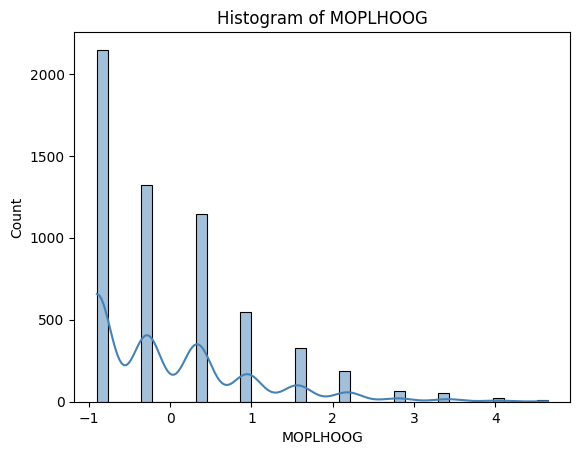

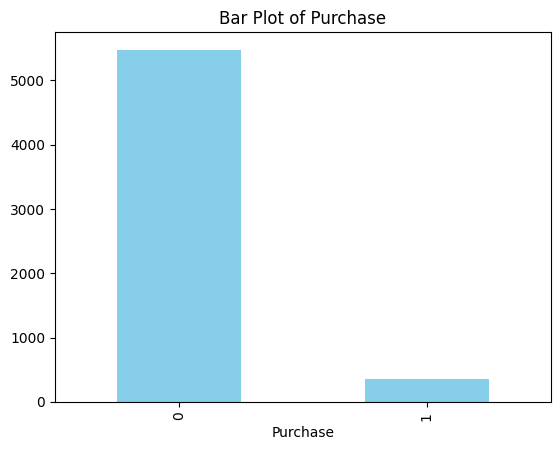

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for a numeric column (e.g., 'MOPLHOOG')
if 'MOPLHOOG' in numeric_cols:
    sns.histplot(data['MOPLHOOG'], kde=True, color='steelblue')
    plt.title('Histogram of MOPLHOOG')
    plt.show()

# Bar plot for a categorical column (e.g., 'Purchase')
if 'Purchase' in data.columns:
    data['Purchase'].value_counts().plot(kind='bar', color='skyblue')
    plt.title('Bar Plot of Purchase')
    plt.show()


# **7. Bivariate Analysis**

<ipython-input-21-d0f358fe9ce7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Purchase', y='MOPLHOOG', data=data, palette='pastel')


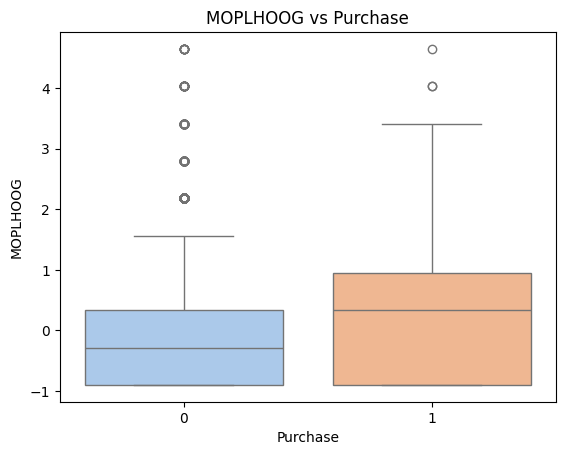

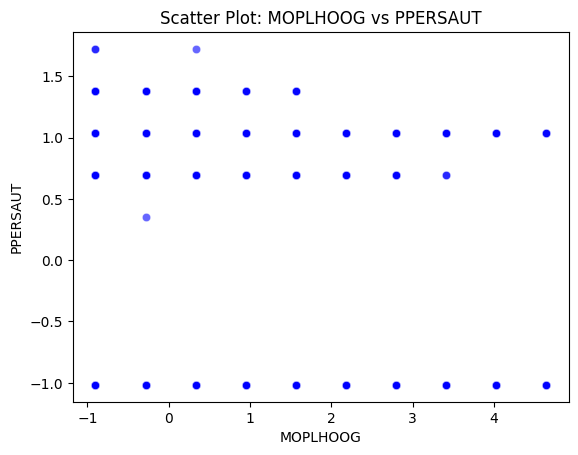

In [21]:
# Boxplot of numeric column grouped by categorical column
if 'Purchase' in data.columns and 'MOPLHOOG' in numeric_cols:
    sns.boxplot(x='Purchase', y='MOPLHOOG', data=data, palette='pastel')
    plt.title('MOPLHOOG vs Purchase')
    plt.show()

# Scatter plot between two numeric columns
if {'MOPLHOOG', 'PPERSAUT'}.issubset(numeric_cols):
    sns.scatterplot(x='MOPLHOOG', y='PPERSAUT', data=data, color='blue', alpha=0.6)
    plt.title('Scatter Plot: MOPLHOOG vs PPERSAUT')
    plt.show()


# **8. Multivariate Analysis**

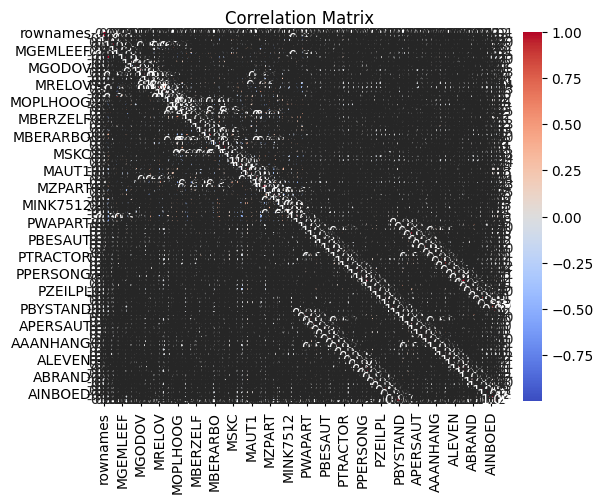

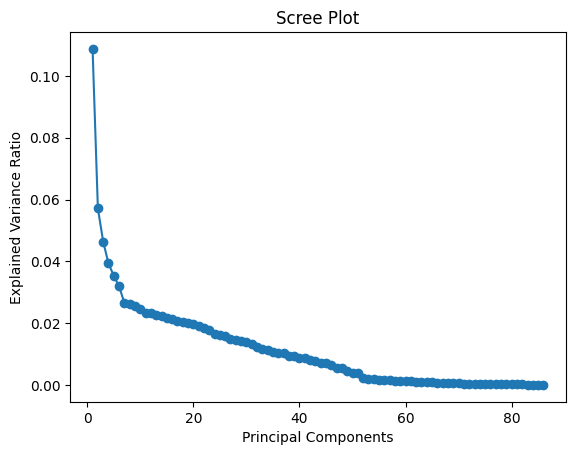

<ipython-input-23-0ca34787cb64>:23: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(data['Purchase']):


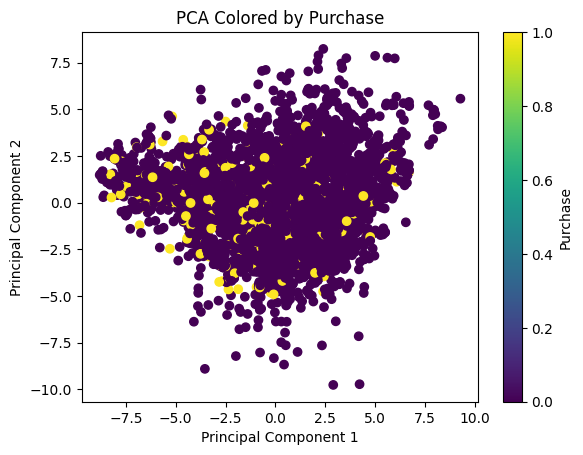

In [23]:
# Correlation matrix and heatmap
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# PCA (Principal Component Analysis)
from sklearn.decomposition import PCA

pca = PCA()
pca_result = pca.fit_transform(data[numeric_cols])

# Scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# 2D PCA Visualization (if 'Purchase' is present)
if 'Purchase' in data.columns:
    # Convert 'Purchase' to categorical if not already
    if not pd.api.types.is_categorical_dtype(data['Purchase']):
        data['Purchase'] = data['Purchase'].astype('category')

    # Perform the PCA visualization
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Purchase'].cat.codes, cmap='viridis')
    plt.title('PCA Colored by Purchase')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Purchase')
    plt.show()
